In [183]:
#AJUSTES:
# 17/05/2020: 
#  i_cuar2 = [13, 42]
#  [12.539712854059823, array([1.7e-07, 8.2e-08, 1.4e-07]), 0.3333333333333333, 0.1, 54.285714285714285, 0.1, 0.1]

# 23/05/2020
#  i_cuar2 = [13, 38, 46]
#  [13.521348015765085, array([1.70e-07, 8.40e-08, 1.20e-07, 1.05e-07]), 0.3333333333333333, 0.1, 54.285714285714285, 0.1, 0.1]

In [184]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import datetime

import sys
sys.path.insert(1, '../src/')

from SEIR_exams_measures import *


In [185]:
minsal = True
if minsal:
    df = pd.read_csv ("../data/COVID_Chile_Regiones.csv")
    df = df.dropna(subset = ["Region"])
    df["Fecha_dt"] = pd.to_datetime (df["Fecha"])
    df["Fecha_dt"][df["Fecha_dt"] >= '2020-03-18'] -=  pd.Timedelta(hours=12)

    df = df[(df["Region"] == "Biobío") & (df["Contagiados"] > 0)]
    df = df[df["Fecha_dt"] <= '2020-05-27']
    i_data = df["Contagiados"].values
    df = df[(df["Region"] == "Biobío") & (df["Contagiados"] > 50)]
else:
    df = pd.read_excel("../data/Biobio.xls")
    df["Fecha_dt"] = pd.to_datetime (df["Fecha"])
    i_data = df["Contagiados"].values
    df = df[df.Contagiados > 50]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [186]:
df = df.reset_index(drop=True)

In [187]:
df

,Region,Contagiados,Muertes,Recuperados,Infectados_Actuales,Fecha,Total_Contagiados,Fecha_dt
0,Biobío,73,0,1,72,3/24/2020,NaN,2020-03-23 12:00:00
1,Biobío,95,1,0,94,3/25/2020,NaN,2020-03-24 12:00:00
2,Biobío,109,1,0,108,3/26/2020,NaN,2020-03-25 12:00:00
3,Biobío,135,2,1,132,3/27/2020,NaN,2020-03-26 12:00:00
4,Biobío,151,2,1,148,3/28/2020,NaN,2020-03-27 12:00:00
5,Biobío,185,2,1,182,3/29/2020,NaN,2020-03-28 12:00:00
6,Biobío,201,2,2,197,3/30/2020,NaN,2020-03-29 12:00:00
7,Biobío,216,2,2,212,3/31/2020,NaN,2020-03-30 12:00:00
8,Biobío,240,2,5,233,4/1/2020,NaN,2020-03-31 12:00:00
9,Biobío,275,2,12,261,4/2/2020,NaN,2020-04-01 12:00:00


In [188]:
i_cuar = 10
i_cuar = 14

print (df.Fecha.iloc[i_cuar])

i_cuar2 = [13, 42]
i_cuar2 = [13, 38, 46]
print (i_cuar2)
print (df.Fecha.iloc[i_cuar2])
print (df.Fecha.iloc[0])
t_data = np.arange(len(df.Infectados_Actuales))
C_real = df.Contagiados.values
I_real = df.Infectados_Actuales.values
R_real = df.Recuperados.values + df.Muertes.values



4/7/2020
[13, 38, 46]
13    4/6/2020
38    5/1/2020
46    5/9/2020
Name: Fecha, dtype: object
3/24/2020


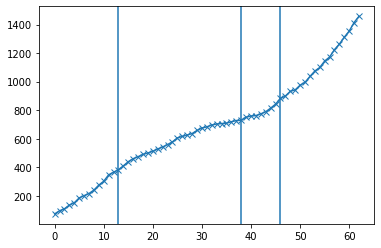

In [189]:
plt.plot(t_data, C_real, marker = "x")
for i in i_cuar2:
    plt.axvline(i)

In [113]:
pop = 1663696

# Ajuste a primeros días
r0 =  0 
e0 =  22 
i0 =  90

s0 = pop - i0 - r0 - e0
c0 = C_real[0]


In [176]:
#[8.486029477192394, array([7.e-07, 1.e-14]), 0.5, 0.125, 50.0, 0.1, 0.4] 2.0 8.0
#[12.020757851191542, array([8.e-07, 1.e-07, 5.e-07]), 
# 0.5, 0.16666666666666666, 40.0, 0.03162277660168379, 0.30000000000000004]
#  min: RMSE =  12.953268281789375 ; b, s, g =  [array([8.e-07, 1.e-07, 3.e-07]), 0.3333333333333333, 0.125] ; a_d, k, a =  [60.0, 0.01, 0.5] ; ( 3.0 ,  8.0 )

trans_coeffs = []
trans_coeffs.append(np.array([1.7e-7]))
#trans_coeffs.append(np.array([8e-8, 8.2e-8, 8.4e-8, 8.6e-8]))
trans_coeffs.append(np.array([8.4e-8]))
trans_coeffs.append(np.array([1.1e-7, 1.2e-7, 1.3e-7]))
trans_coeffs.append(np.array([1.05e-7, 1.1e-7, 1.15e-7]))

print (trans_coeffs)

[array([1.7e-07]), array([8.4e-08]), array([1.1e-07, 1.2e-07, 1.3e-07]), array([1.05e-07, 1.10e-07, 1.15e-07])]


4.895477023965976e-07
0.6871168953272974 
0.05555556343557843 
56.08000441355646 
0.09999472332437251 
0.3856258452621279

In [177]:
min_ = GridSearchSEIR_exams_measures (t_data, s0, e0, i0, r0, c0, c0, C_real, i_dates_betas = i_cuar2,
                                      transmission_coeffs = trans_coeffs, # 1 / day person                                                              
                                      latency_time = np.arange(1., 7., 1.), # days                                                                                                               
                                      infectious_time = np.arange(6., 18, 2.), # days                                                                                                            
                                      ks = 10**np.linspace(-2, 0, 5),
                                      a_dates = np.linspace (20, 80, 8),
                                      a_s = np.linspace(0.1, .9, 9), backward = True)


{'b0': array([1.7e-07]), 'b1': array([8.4e-08]), 'b2': array([1.1e-07, 1.2e-07, 1.3e-07]), 'b3': array([1.05e-07, 1.10e-07, 1.15e-07])}
betas =  [1.70e-07 8.40e-08 1.10e-07 1.05e-07] 52.19557285308838
  min: RMSE =  22.60174108497888 ; b, s, g =  [array([1.70e-07, 8.40e-08, 1.10e-07, 1.05e-07]), 0.3333333333333333, 0.1] ; a_d, k, a =  [54.285714285714285, 0.1, 0.1] ; ( 3.0 ,  10.0 )
betas =  [1.7e-07 8.4e-08 1.1e-07 1.1e-07] 50.71135902404785
  min: RMSE =  18.282287078306 ; b, s, g =  [array([1.7e-07, 8.4e-08, 1.1e-07, 1.1e-07]), 0.3333333333333333, 0.1] ; a_d, k, a =  [54.285714285714285, 0.1, 0.1] ; ( 3.0 ,  10.0 )
betas =  [1.70e-07 8.40e-08 1.10e-07 1.15e-07] 45.42730712890625
  min: RMSE =  15.001254254958232 ; b, s, g =  [array([1.70e-07, 8.40e-08, 1.10e-07, 1.15e-07]), 0.3333333333333333, 0.1] ; a_d, k, a =  [54.285714285714285, 0.1, 0.1] ; ( 3.0 ,  10.0 )
betas =  [1.70e-07 8.40e-08 1.20e-07 1.05e-07] 43.747194051742554
  min: RMSE =  13.521348015765085 ; b, s, g =  [array([1.

In [240]:
fecha_proy = "5/17/2020"
i_cuar2 = [13, 42]
min_ = [12.539712854059823, np.array([1.7e-07, 8.2e-08, 1.4e-07]), 0.3333333333333333, 0.1, 54.285714285714285, 0.1, 0.1]

fecha_proy = "5/24/2020"
i_cuar2 = [13, 38, 46]
min_ = [13.521348015765085, np.array([1.70e-07, 8.40e-08, 1.20e-07, 1.05e-07]), 0.3333333333333333, 0.1, 54.285714285714285, 0.1, 0.1]

In [241]:
RMSE, betas_g, sigma_g, gamma_g, a_date_g, k_g, a_g = min_
print (min_, 1./sigma_g, 1/gamma_g)
i_cuar3 = i_cuar2
# [12.020757851191542, array([8.e-07, 1.e-07, 5.e-07]), 0.5, 0.16666666666666666, 40.0, 0.03162277660168379, 0.3]
#[8.486029477192394, array([7.e-07, 1.e-14]), 0.5, 0.125, 50.0, 0.1, 0.4] 2.0 8.0
#betas_g, sigma_g, gamma_g, a_date_g, k_g, a_g = np.array([7.e-07, 1.e-14, 7.e-07]), 0.5, 0.125, 50.0, 0.1, 0.4
#i_cuar3 = i_cuar2[:2]

[13.521348015765085, array([1.70e-07, 8.40e-08, 1.20e-07, 1.05e-07]), 0.3333333333333333, 0.1, 54.285714285714285, 0.1, 0.1] 3.0 10.0


In [242]:
ts = np.arange (0, 100, 1)
i_ini = len(i_data) - len(I_real)
x_plot_data = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in t_data.astype(float)])

x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(ts), dtype = float)])

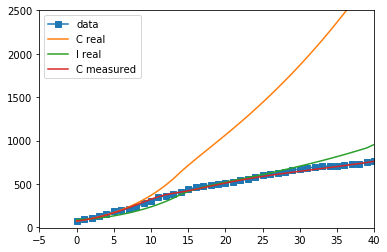

In [243]:

S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar3, betas_g, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

plt.plot (t_data, C_real, label = "data", marker = "s")
plt.plot (ts, C_c_g, label = "C real")
plt.plot (ts, I_c_g, label = "I real")
plt.plot (ts, C_m_g, label = "C measured")

plt.xlim(-5, 40)
plt.ylim(-5, 2500)
plt.legend()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


1663584
2020-05-17 12:00:00 55


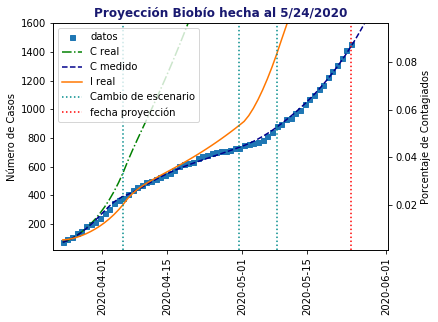

In [244]:
print (s0)
ts = np.arange (0, 100, 1)
x_plot_data = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in t_data.astype(float)])

x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(ts), dtype = float)])

S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar3, betas_g, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

plt.figure(figsize = (6, 5))
plt.subplots_adjust(bottom = 0.25)

plt.plot (x_plot_data, C_real, label = "datos", marker = "s", ls = "", markersize = 5)
plt.plot (x_plot_proy, C_c_g, label = "C real", c = "green", ls = "-.")
plt.plot (x_plot_proy, C_m_g, label = "C medido", c = "darkblue", ls = "--")
plt.plot (x_plot_proy, I_c_g, label = "I real", c = "#ff7700")
plt.axvline (x_plot_proy[i_cuar2[0]], ls = ":", label = "Cambio de escenario", c = "darkcyan")
for i in range (1, len(i_cuar2)):
    plt.axvline (x_plot_proy[i_cuar2[i]], ls = ":", c = "darkcyan")
print (x_plot_proy[55], df.index[df.Fecha == "5/17/2020"][0] +1)
plt.axvline (x_plot_proy[df.index[df.Fecha == fecha_proy][0] +1], ls = ":", c = "red", label = "fecha proyección")
plt.xlim (x_plot_proy[0] - pd.Timedelta(days=2), x_plot_proy[70])
plt.ylim (20, 1600)
plt.xticks(rotation = 90)
plt.ylabel ("Número de Casos")
plt.title ("Proyección Biobío hecha al " + fecha_proy, c = "midnightblue", weight = "bold")
plt.legend(loc = "upper left")

ax1 = plt.gca()
ax2 = ax1.twinx ()
ax2.set_ylabel ("Porcentaje de Contagiados")
ax2.set_ylim (np.array(ax1.get_ylim())/ pop*100)

plt.savefig('Biobio_1.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


1663584


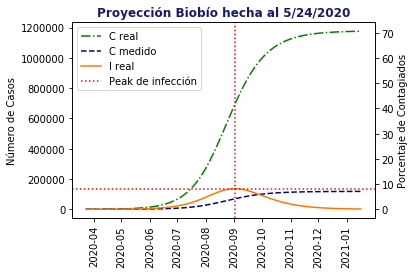

In [245]:
print (s0)
ts = np.arange (0, 300, 1)
x_plot_data = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in t_data.astype(float)])

x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(ts), dtype = float)])
 
S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar2, betas_g, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)
plt.subplots_adjust(left = 0.2, bottom = 0.2)
#plt.plot (x_plot_data, C_real, label = "datos", marker = "s")
plt.plot (x_plot_proy, C_c_g, label = "C real", c = "green", ls = "-.")
plt.plot (x_plot_proy, C_m_g, label = "C medido", c = "darkblue", ls = "--")
plt.plot (x_plot_proy, I_c_g, label = "I real", c = "#ff7700")
#plt.axvline (x_plot_proy[i_cuar2[0]], ls = ":", label = "Cambio de escenario", c = "darkcyan")
#for i in range (1, len(i_cuar2)):
#    plt.axvline (x_plot_proy[i_cuar2[i]], ls = ":", c = "darkcyan")
    
plt.axvline (x_plot_proy[I_c_g.argmax()], ls = ":", c = "red", label = "Peak de infección")
plt.axhline (I_c_g.max(), ls = ":", c = "red")
#plt.xlim (x_plot_proy[0], x_plot_proy[40])
plt.xticks(rotation = 90)
plt.ylabel ("Número de Casos")
plt.title ("Proyección Biobío hecha al " + fecha_proy, c = "midnightblue", weight = "bold")
plt.legend(loc = "upper left")

ax1 = plt.gca()
ax2 = ax1.twinx ()
ax2.set_ylabel ("Porcentaje de Contagiados")
ax2.set_ylim (np.array(ax1.get_ylim())/ pop*100)
plt.savefig('Biobio_2.eps', format='eps')

In [122]:
print (np.sqrt(((C_real-C_m_g[:len(C_real)])**2).mean()))

22.19845808044505


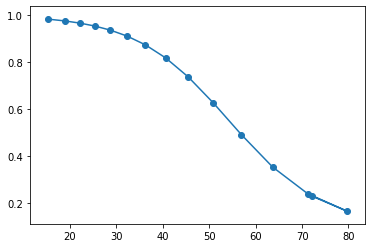

In [123]:
dC_c_g = C_c_g [1:16] - C_c_g[:15]
dC_m_g = C_m_g [1:16] - C_m_g[:15]
a__ = dC_m_g/dC_c_g
alphas = 1 + (a_g-1)/(1+np.exp(-k_g*(dC_c_g-a_date_g)))
plt.plot (dC_c_g, alphas)

plt.scatter (dC_c_g, a__)

In [124]:
print(betas_g)
betas_g2 =np.array([7.e-7, 1.e-14, 7.e-7])

[1.5e-07 8.2e-08 1.3e-07]


In [125]:
S_c_g2, E_c_g2, I_c_g2, R_c_g2, C_c_g2, C_m_g2 = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            [i_cuar, 30], betas_g2, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

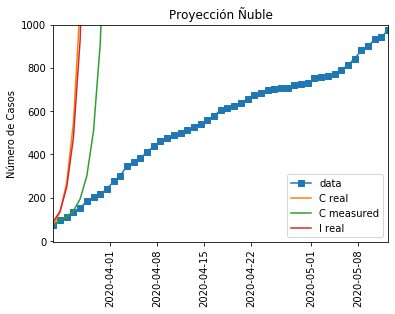

In [126]:
plt.plot (x_plot_data, C_real, label = "data", marker = "s")
plt.plot (x_plot_proy, C_c_g2, label = "C real")
plt.plot (x_plot_proy, C_m_g2, label = "C measured")
plt.plot (x_plot_proy, I_c_g2, label = "I real")
plt.plot ()
plt.xlim (x_plot_proy[0], x_plot_proy[50])
plt.ylim (-5, 1000)
plt.xticks(rotation = 90)
plt.ylabel ("Número de Casos")
plt.title ("Proyección Ñuble")
plt.legend()

# Cuarentenas alternadas

In [127]:
i_cuar3 = i_cuar2[:2]
N_cuar = 20
N_days = 14
for i in range (N_cuar):
    i_cuar3.append(i_cuar3[-1] + N_days)
betas_g3 = []
for i in range(len(i_cuar3) + 1):
    if i%2 == 0:
        betas_g3.append(betas_g[0])
    else:
        betas_g3.append(betas_g[1])
        
print (betas_g3)

[1.5e-07, 8.2e-08, 1.5e-07, 8.2e-08, 1.5e-07, 8.2e-08, 1.5e-07, 8.2e-08, 1.5e-07, 8.2e-08, 1.5e-07, 8.2e-08, 1.5e-07, 8.2e-08, 1.5e-07, 8.2e-08, 1.5e-07, 8.2e-08, 1.5e-07, 8.2e-08, 1.5e-07, 8.2e-08, 1.5e-07]


In [128]:
print (i_cuar3)

[13, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168, 182, 196, 210, 224, 238, 252, 266, 280, 294, 308, 322]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


207564.90641380264 12.476131842223738


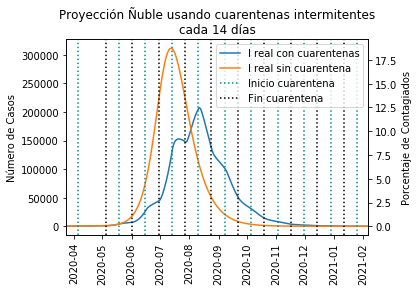

In [129]:
ts = np.arange (0, 1000, 1)
x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(ts), dtype = float)])

S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar3, betas_g3, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)
S_c_g_nc, E_c_g_nc, I_c_g_nc, R_c_g_nc, C_c_g_nc, C_m_g_nc = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            i_cuar3[:2], betas_g3[:3], sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

plt.subplots_adjust(left = 0.2, bottom = 0.2)
#plt.figure(figsize = (7, 7))
#plt.plot (x_plot_proy, C_c_g, label = "C real con cuarentenas")
#plt.plot (x_plot_proy, C_m_g, label = "C medido con cuarentenas")
plt.plot (x_plot_proy, I_c_g, label = "I real con cuarentenas")
#plt.plot (x_plot_proy, C_c_g_nc, label = "C real sin cuarentenas")
#plt.plot (x_plot_proy, C_m_g_nc, label = "C medido sin cuarentenas")
plt.plot (x_plot_proy, I_c_g_nc, label = "I real sin cuarentena")
#plt.ylim (-10, 360000)
plt.xlim (x_plot_proy[0], x_plot_proy[320])
plt.xticks(rotation = 90)
plt.axvline (x_plot_proy[i_cuar3[0]], ls = ":", label = "Inicio cuarentena", c = "darkcyan")
plt.axvline (x_plot_proy[i_cuar3[1]], ls = ":", label = "Fin cuarentena", c = "k")
for i in range (2, len(i_cuar3)):
    if (i % 2 == 0):
        plt.axvline (x_plot_proy[i_cuar3[i]], ls = ":", c = "darkcyan")
    else: 
        plt.axvline (x_plot_proy[i_cuar3[i]], ls = ":", c = "k")

plt.ylabel ("Número de Casos")
plt.title ("Proyección Ñuble usando cuarentenas intermitentes\ncada " + str(N_days) + " días")
plt.legend()

ax1 = plt.gca()
ax2 = ax1.twinx ()
ax2.set_ylabel ("Porcentaje de Contagiados")
ax2.set_ylim (np.array(ax1.get_ylim())/ pop*100)

print (I_c_g.max(), I_c_g.max()*100/pop)

plt.savefig('Nuble_cuarprog.eps', format='eps')